## Instacart data로 구매 패턴 분석해보기

[데이터 설명]
- 이 데이터셋은 시간에 따른 고객 주문을 설명하는 csv 파일들로 구성되어 있습니다.

- 이 데이터는 사용자가 다음 주문에 포함할 제품들을 예측하는 것입니다. 즉, 어떤 물품을 다시 주문할지 예측하는 문제를 풀어야 합니다.

- 데이터셋은 익명화되어 있으며 20만 명이 넘는 instacart 사용자의 300만건 이상의 주문들을 포함하고 있습니다.

- 각 사용자별로, 4회에서 100회 사이의 주문 데이터가 제공됩니다. 또한 주문이 이루어진 주와 시간, 그리고 주문 간의 상대적인 시간을 제공합니다.

- 데이터 파일은 6개로 구성되어 있으며, 각 csv 파일에 대한 설명은 다음과 같습니다.

각 csv파일들(customer, product, order, aisle, etc.)은 각자의 unique id를 포함하고 있습니다. 각 파일들의 대한 설명을 csv파일 이름과 column 이름을 읽으면 이해 가능한 수준입니다.

[csv별 설명]
1. aisle.csv - 아이템 중분류

2. department.csv - 아이템 대분류

3. orders.csv - 각 주문 내역들에 대한 정보

4. order_products__train.csv - 모든 고객의 이전 주문 내용이 포함되어 있습니다. 'reordered' column은 어떤 고객이 과거에 구매여부를 의미합니다. 일부 주문에는 reordered 품목이 없을 수 있습니다. reordered 품목이 없는 주문의 경우 명시적으로 '없음' 값을 예측할 수 있습니다.

5. products.csv - 각 아이템들에 대한 정보


**이제 위에서 주어진 정보를 기반으로 EDA를 수행하여 아래 10개의 질문에 대한 답변을 출력하는 파이썬 코드를 작성하세요.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Q1. instacart-market-basket-analysis 폴더에서 데이터를 모두 불러오세요.

In [2]:
# 데이터를 불러오면 처음 무조건 파악해야하는 것!
data_path = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/data" ## data_path는 데이터가 있는 폴더의 경로를 의미합니다.
aisles = pd.read_csv(f"{data_path}/aisles.csv")
departments = pd.read_csv(f"{data_path}/departments.csv")

orders = pd.read_csv(f"{data_path}/orders.csv")
train = pd.read_csv(f"{data_path}/order_products__train.csv")
products = pd.read_csv(f"{data_path}/products.csv")

### Q2. 어떤 Product가 가장 많이 reorder가 되었는가?

In [3]:
reorder_counts = train[train['reordered'] == 1].groupby('product_id').size()
most_reordered_product_id = reorder_counts.idxmax()
most_reordered_product = products.loc[products['product_id'] == most_reordered_product_id, 'product_name'].values[0]

print(most_reordered_product_id, most_reordered_product)

24852 Banana


### Q3. 가장 많이 주문된 Product는?

In [4]:
order_counts = train.groupby('product_id').size()
most_ordered_product_id = order_counts.idxmax()
most_ordered_product = products.loc[products['product_id'] == most_ordered_product_id, 'product_name'].values[0]

print(most_ordered_product_id, most_ordered_product)

24852 Banana


### Q4. reorder가 가장 많이 일어나는 department는?

In [6]:
# Merge the order_products_train with products and then with departments
merged_data = train.merge(products, on='product_id')
merged_data = merged_data.merge(departments, on='department_id')
print(merged_data.head())

# Filter for reordered items and calculate the number of reorders per department
reorder_department_counts = merged_data[merged_data['reordered'] == 1].groupby('department').size()
most_reordered_department = reorder_department_counts.idxmax()
print(most_reordered_department)

   order_id  product_id  add_to_cart_order  reordered      product_name  \
0         1       49302                  1          1  Bulgarian Yogurt   
1    816049       49302                  7          1  Bulgarian Yogurt   
2   1242203       49302                  1          1  Bulgarian Yogurt   
3   1383349       49302                 11          1  Bulgarian Yogurt   
4   1787378       49302                  8          0  Bulgarian Yogurt   

   aisle_id  department_id  department  
0       120             16  dairy eggs  
1       120             16  dairy eggs  
2       120             16  dairy eggs  
3       120             16  dairy eggs  
4       120             16  dairy eggs  
produce


### Q5. order를 가장 많이 한 user는?

In [7]:
user_order_counts = orders.groupby('user_id').size()
most_ordering_user = user_order_counts.idxmax()
most_ordering_user, user_order_counts[most_ordering_user]

(210, 100)

### Q6. order가 가장 많이 일어난 요일을 bargraph로 나타내면?

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9

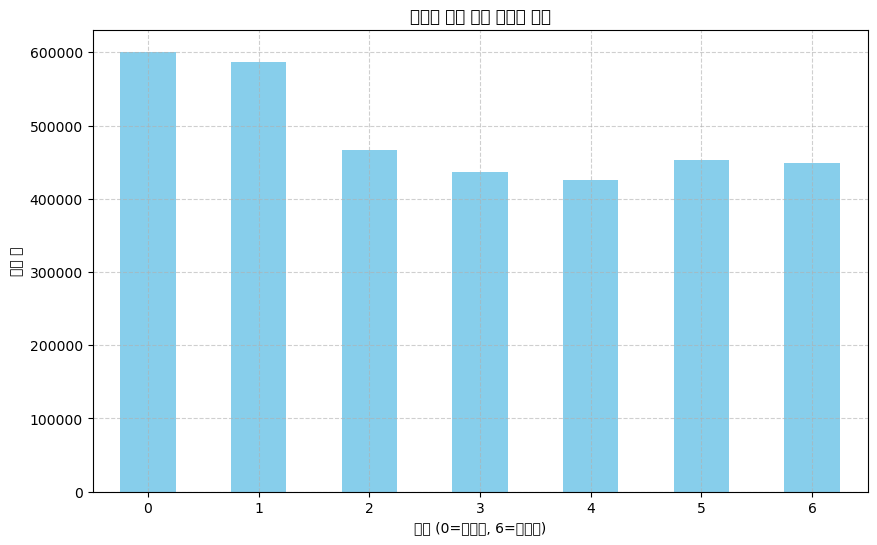

In [8]:
order_dow_counts = orders['order_dow'].value_counts().sort_index()

# Bar graph
plt.figure(figsize=(10, 6))
order_dow_counts.plot(kind='bar', color='skyblue')
plt.title('주문이 가장 많이 일어난 요일')
plt.xlabel('요일 (0=일요일, 6=토요일)')
plt.ylabel('주문 수')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Q7. 재구매율이 높은 product top10은?

In [9]:
product_reorder_ratios = train.groupby('product_id')['reordered'].mean()
top10_reorder_products = product_reorder_ratios.nlargest(10)
top10_reorder_products_details = products.set_index('product_id').loc[top10_reorder_products.index, 'product_name']

top10_reorder_products_details

product_id
3                Robust Golden Unsweetened Oolong Tea
5                           Green Chile Anytime Sauce
7                      Pure Coconut Water With Orange
33                      Organic Spaghetti Style Pasta
59               Medium Taqueria Style Chipotle Salsa
78                  Nutter Butter Cookie Bites Go-Pak
98                          2% Yellow American Cheese
107                                 Mild Salsa Divino
134    Stain Release Boost In-Wash Stain Remover Pacs
136                                            Simple
Name: product_name, dtype: object

### Q8. 재구매가 가장 많이 일어나는 요일 top3는?

In [11]:
merged_orders_reorders = orders.merge(train[train['reordered'] == 1], on='order_id')

# Calculate reorders per day of the week
reorder_dow_counts = merged_orders_reorders['order_dow'].value_counts()
top3_reorder_days = reorder_dow_counts.nlargest(3)

top3_reorder_days

0    197534
1    123376
6    123173
Name: order_dow, dtype: int64

### Q9. days_since_prior에 따른 reorder 횟수 변화를 lineplot과 barplot으로 나타내면?

- x축은 서로 다른 reorder 횟수가 됩니다.

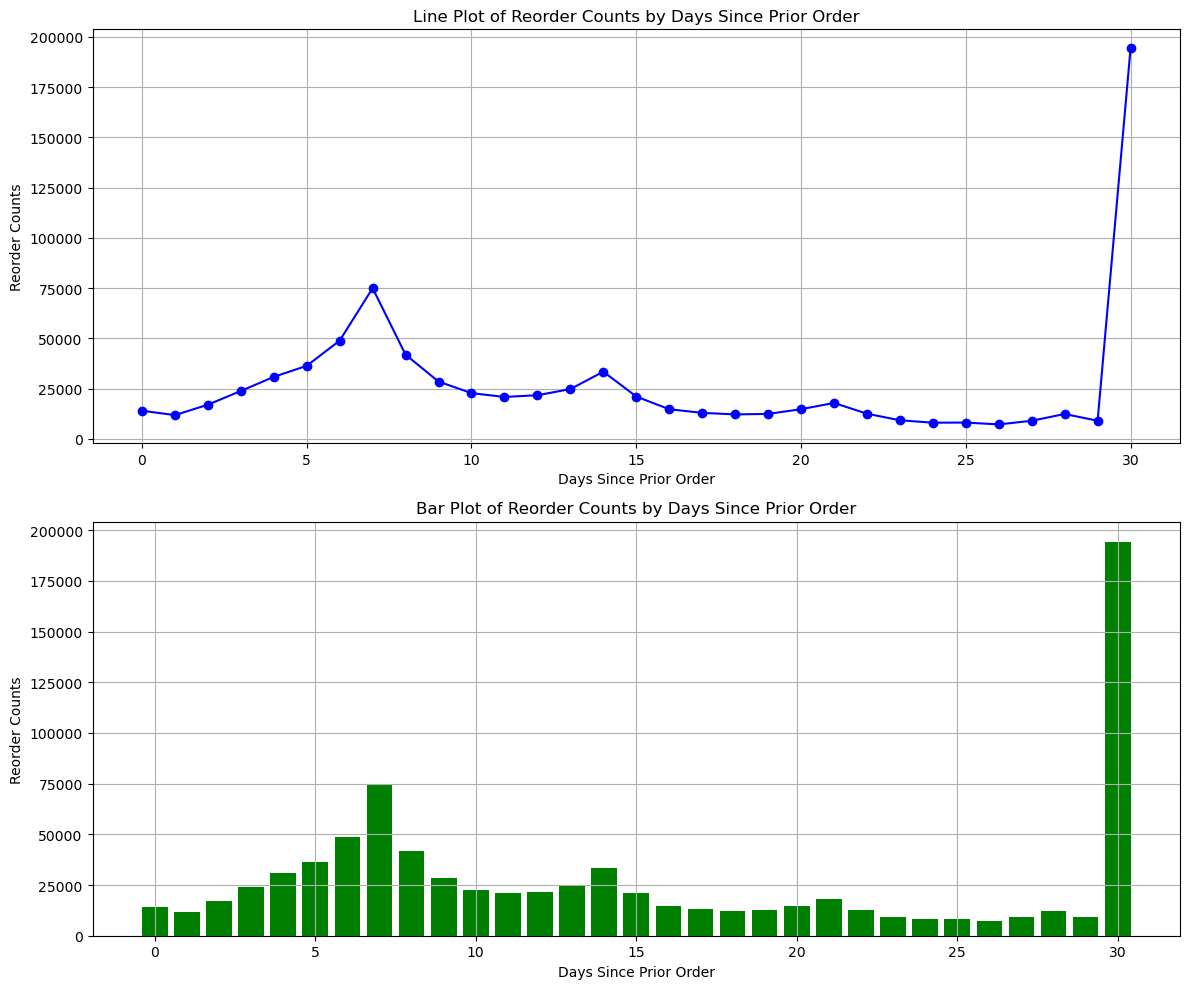

In [14]:
# Merge orders with order_products_train on order_id
merged_orders = orders.merge(train, on='order_id')

# Attempting a simpler and more direct approach for the analysis
# Q9: Reattempt to calculate reorder counts by days_since_prior_order
reorder_days_counts = merged_orders[merged_orders['reordered'] == 1].groupby('days_since_prior_order')['order_id'].count()

# Reattempt to plot the results
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Lineplot
ax[0].plot(reorder_days_counts.index, reorder_days_counts.values, marker='o', linestyle='-', color='blue')
ax[0].set_title('Line Plot of Reorder Counts by Days Since Prior Order')
ax[0].set_xlabel('Days Since Prior Order')
ax[0].set_ylabel('Reorder Counts')
ax[0].grid(True)

# Barplot
ax[1].bar(reorder_days_counts.index, reorder_days_counts.values, color='green')
ax[1].set_title('Bar Plot of Reorder Counts by Days Since Prior Order')
ax[1].set_xlabel('Days Since Prior Order')
ax[1].set_ylabel('Reorder Counts')
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Q10. 시간대 변화에 따른 order 물량의 변화량을 lineplot과 barplot을 이용하여 나타내면?

- 시간대 변화란 0시부터 23시까지의 시간당 변화를 의미합니다.

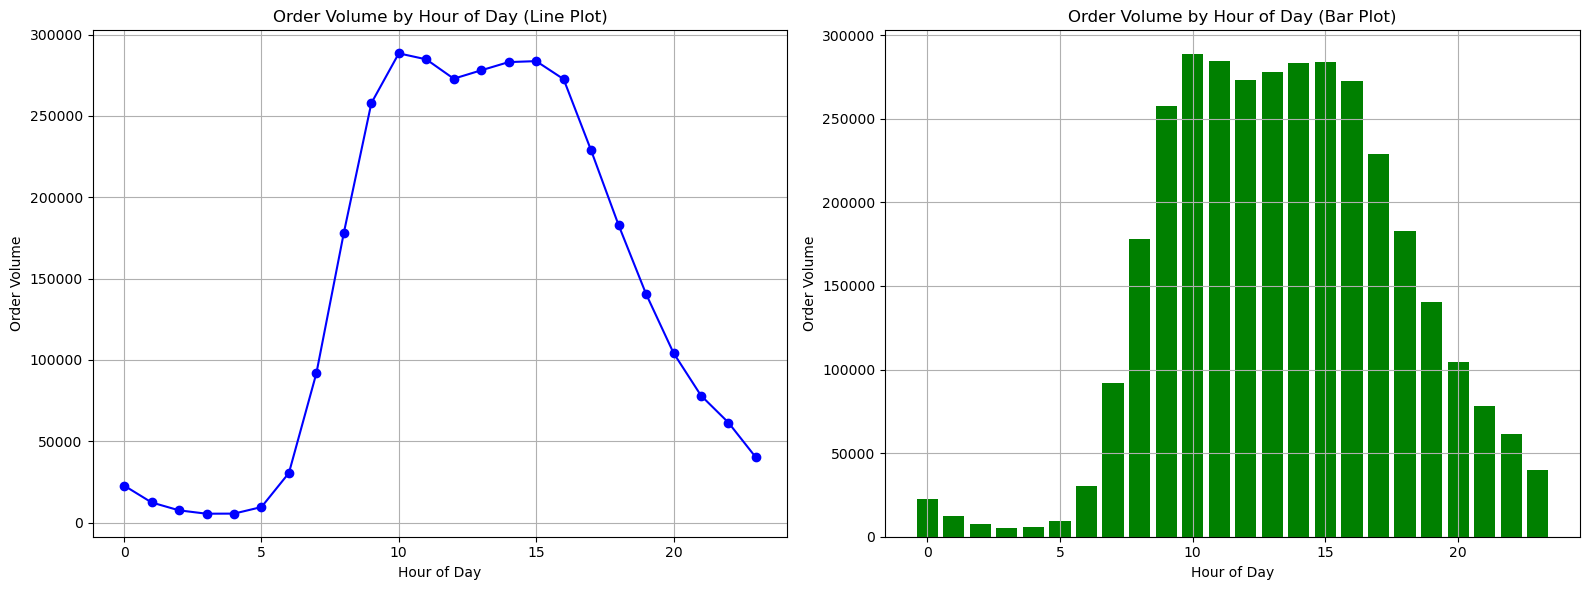

In [15]:
order_hour_counts = orders['order_hour_of_day'].value_counts().sort_index()

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Lineplot for order counts by hour of the day
ax1.plot(order_hour_counts.index, order_hour_counts.values, marker='o', linestyle='-', color='blue')
ax1.set_title('Order Volume by Hour of Day (Line Plot)')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Order Volume')
ax1.grid(True)

# Barplot for order counts by hour of the day
ax2.bar(order_hour_counts.index, order_hour_counts.values, color='green')
ax2.set_title('Order Volume by Hour of Day (Bar Plot)')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Order Volume')
ax2.grid(True)

plt.tight_layout()
plt.show()